In this notebook, we will be exploring the use of convolutional neural networks in image classification to see whether they perform significantly better than fully connected neural networks that are in similar size, whether techniques like dropout and data augmentation to avoid overfitting works, and whether the resnet-like structure performs better than ordinary convolutional neural networks. 

That being said, there are 6 different models trained on the MNIST digit recognition dataset:

1. fully connected neural network
2. fully connected neural network with dropout
3. fully connected neural network with data augmentation
3. convolutional neural network
4. convolutional neural network with data augmentation
5. resnet-like CNN with data augmentation

the MNIST dataset I used is on kaggle. Since only the labels of the training set was given, we are going to treat this as the whole dataset and perform train test split on it.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Random shuffle the dataset to perform train test split

In [4]:
df.sample(frac = 1, random_state = 1).reset_index()

,index,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,29633,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,345,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36369,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16624,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14389,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,7813,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,32511,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,5192,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,12172,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the dataset into training set and test set and transform the labels in the format of one hot encoding

In [5]:
train = df[:int(42000*0.8)]
test = df[int(42000*0.8):]
X_train = np.array(train.drop(['label'], axis = 1))/255.0
Y_train = train['label'].tolist()
y_train = np.zeros((len(Y_train),10))
for i in range(len(Y_train)):
    y_train[i,Y_train[i]] = 1
X_test = np.array(test.drop('label', axis = 1))/255.0
Y_test = test['label'].tolist()
y_test = np.zeros((len(Y_test),10))
for i in range(len(Y_test)):
    y_test[i,Y_test[i]] = 1

define our first model and train it

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
inputs = tf.keras.Input(shape = 784)
x = Dense(100, activation = 'relu')(inputs)
x = Dense(10, activation = 'softmax')(x)
MLP = tf.keras.Model(inputs, x)
MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2022-12-11 19:39:52.389918: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
MLP.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
history = MLP.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=25,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

2022-12-11 19:39:52.859227: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.9063 - val_loss: 0.1825 - val_accuracy: 0.9464
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1529 - accuracy: 0.9561 - val_loss: 0.1421 - val_accuracy: 0.9562
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1065 - accuracy: 0.9697 - val_loss: 0.1071 - val_accuracy: 0.9668
Epoch 4/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0799 - accuracy: 0.9764 - val_loss: 0.1033 - val_accuracy: 0.9677
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0622 - accuracy: 0.9823 - val_loss: 0.0994 - val_accuracy: 0.9718
Epoch 6/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0486 - accuracy: 0.9864 - val_loss: 0.1048 - val_accuracy: 0.9681
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.1047 - val_accuracy:

We can see from the following plots that the validation loss is gradually increasing after 5 epochs, which is a sign of overfitting. In order to fix this, we will try to add dropout layers to the model and then train it.

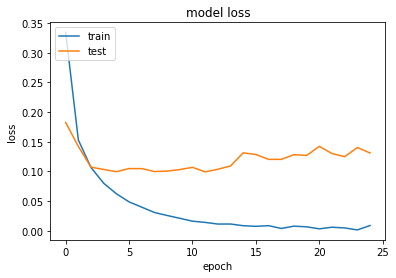

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

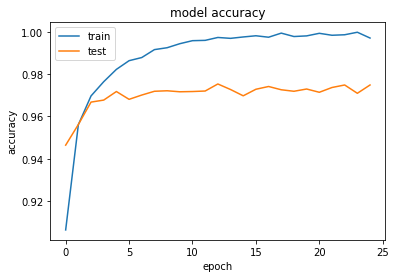

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

a dropout layer with dropout rate of 0.4 is added between the fully-connected layers

In [10]:
from tensorflow.keras.layers import Dropout
inputs = tf.keras.Input(shape = 28*28)
x = Dense(100,activation = 'relu')(inputs)
x = Dropout(0.4)(x)
x = Dense(10, activation = 'softmax')(x)
MLP_Dropout = tf.keras.Model(inputs, x)
MLP_Dropout.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
MLP_Dropout.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
history = MLP_Dropout.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=40,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

Epoch 1/40
1050/1050 [==============================] - 3s 2ms/step - loss: 0.4644 - accuracy: 0.8626 - val_loss: 0.2112 - val_accuracy: 0.9379
Epoch 2/40
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2466 - accuracy: 0.9273 - val_loss: 0.1622 - val_accuracy: 0.9513
Epoch 3/40
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2035 - accuracy: 0.9394 - val_loss: 0.1295 - val_accuracy: 0.9599
Epoch 4/40
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1743 - accuracy: 0.9472 - val_loss: 0.1194 - val_accuracy: 0.9635
Epoch 5/40
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1540 - accuracy: 0.9530 - val_loss: 0.1080 - val_accuracy: 0.9648
Epoch 6/40
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1393 - accuracy: 0.9570 - val_loss: 0.1028 - val_accuracy: 0.9671
Epoch 7/40
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1298 - accuracy: 0.9580 - val_loss: 0.0997 - val_accuracy:

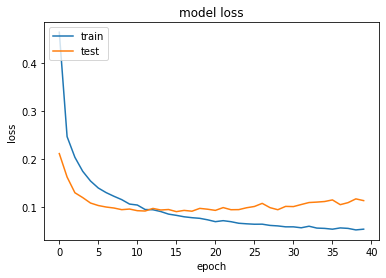

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

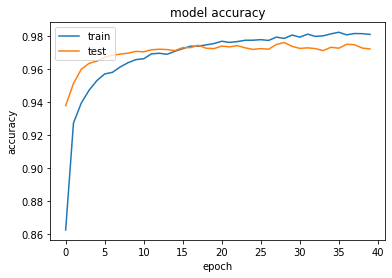

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

It looks like our model still overfits the dataset after applying to dropout. Let's try data augmentation this time. In this notebook, data augmentation is achieved using ImageDataGenerator, which requires our input data to be like images. So we need to reshape the input into a 4-dimensional array, just like images.

In [15]:
X_train = np.array(X_train).reshape((-1,28,28,1))
X_test = X_test.reshape((-1,28,28,1))

In [17]:
from tensorflow.keras.layers import Flatten
inputs = tf.keras.Input(shape = (28,28,1))
x = Flatten()(inputs)
x = Dense(100, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)
MLP = tf.keras.Model(inputs, x)
MLP.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range = 0.2
    )
history = MLP.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
1050/1050 [==============================] - 11s 10ms/step - loss: 0.9349 - accuracy: 0.7126 - val_loss: 0.3755 - val_accuracy: 0.8992
Epoch 2/40
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4358 - accuracy: 0.8725 - val_loss: 0.2806 - val_accuracy: 0.9180
Epoch 3/40
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3471 - accuracy: 0.8981 - val_loss: 0.2316 - val_accuracy: 0.9277
Epoch 4/40
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3139 - accuracy: 0.9063 - val_loss: 0.1904 - val_accuracy: 0.9433
Epoch 5/40
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2847 - accuracy: 0.9143 - val_loss: 0.1776 - val_accuracy: 0.9458
Epoch 6/40
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2740 - accuracy: 0.9188 - val_loss: 0.1680 - val_accuracy: 0.9513
Epoch 7/40
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2534 - accuracy: 0.9249 - val_loss: 0.1553 -

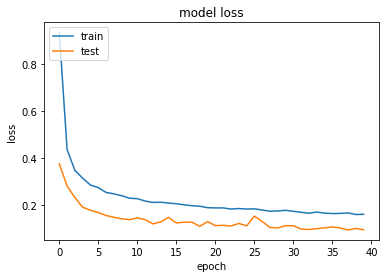

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

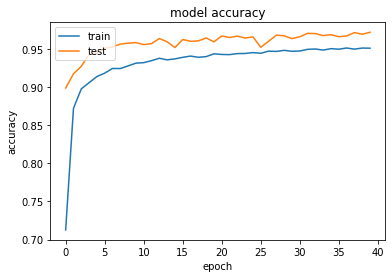

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Oops it looks like the augmented data is too complex for the fully-connected neural network to handle. Why don't we try a convolutional neural network for this.

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
inputs = tf.keras.Input(shape = (28,28,1))
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)
x = Dense(20,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'softmax')(x)
cnn = tf.keras.Model(inputs, x)
cnn.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128 

In [16]:
cnn.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
history = cnn.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=25,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_test, y_test),
)

Epoch 1/25
1050/1050 [==============================] - 50s 46ms/step - loss: 0.2368 - accuracy: 0.9393 - val_loss: 0.0655 - val_accuracy: 0.9817
Epoch 2/25
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0603 - accuracy: 0.9833 - val_loss: 0.0526 - val_accuracy: 0.9846
Epoch 3/25
1050/1050 [==============================] - 47s 45ms/step - loss: 0.0454 - accuracy: 0.9870 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 4/25
1050/1050 [==============================] - 48s 46ms/step - loss: 0.0398 - accuracy: 0.9883 - val_loss: 0.0379 - val_accuracy: 0.9885
Epoch 5/25
1050/1050 [==============================] - 49s 47ms/step - loss: 0.0310 - accuracy: 0.9901 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 6/25
1050/1050 [==============================] - 48s 46ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 7/25
1050/1050 [==============================] - 50s 47ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0331 -

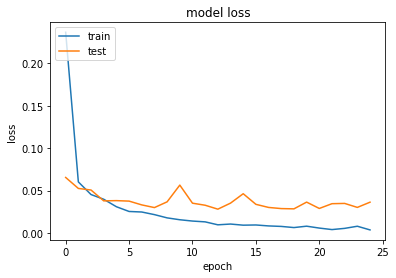

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

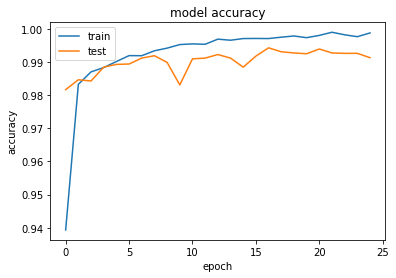

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In this case, if we train the model on raw data we still get (a bit) overfitting problems. Let's what happens if we train the model on augmented data

In [19]:
inputs = tf.keras.Input(shape = (28,28,1))
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x = GlobalAveragePooling2D()(x)
x = Dense(20,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'softmax')(x)
cnn = tf.keras.Model(inputs, x)
cnn.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)


In [20]:
history = cnn.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
1050/1050 [==============================] - 62s 57ms/step - loss: 0.3256 - accuracy: 0.9099 - val_loss: 0.2103 - val_accuracy: 0.9404
Epoch 2/40
1050/1050 [==============================] - 58s 56ms/step - loss: 0.0831 - accuracy: 0.9757 - val_loss: 0.0503 - val_accuracy: 0.9856
Epoch 3/40
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0664 - accuracy: 0.9802 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 4/40
1050/1050 [==============================] - 58s 55ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.0466 - val_accuracy: 0.9858
Epoch 5/40
1050/1050 [==============================] - 58s 55ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 6/40
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0370 - val_accuracy: 0.9904
Epoch 7/40
1050/1050 [==============================] - 57s 55ms/step - loss: 0.0402 - accuracy: 0.9880 - val_loss: 0.0309 -

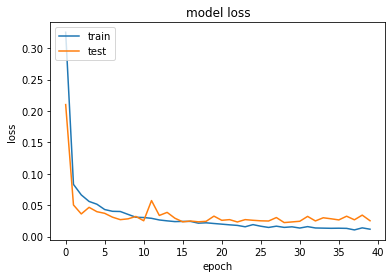

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

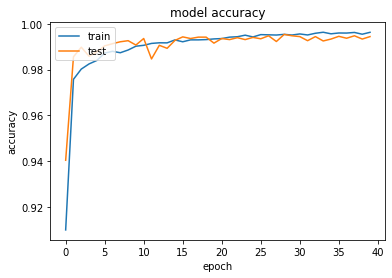

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

It turns out that CNN (with similar number of parameters) handles this data pretty well! This is probably because CNN can extract features from images more easily than fully-connected neural network.

Let's see whether adding residuals make the performance even better.

In [23]:
from tensorflow.keras.layers import Add
inputs = tf.keras.Input(shape = (28,28,1))
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(inputs)
x = BatchNormalization()(x)
x = Conv2D(16,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)

x_shortcut = x
x_shortcut = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x_shortcut)
x_shortcut = BatchNormalization()(x_shortcut)
x = Conv2D(32,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Add()([x,x_shortcut])

x_shortcut = x
x_shortcut = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x_shortcut)
x_shortcut = BatchNormalization()(x_shortcut)
x = Conv2D(64,kernel_size = 3, strides = (2,2), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,kernel_size = 3, padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = Add()([x,x_shortcut])

x = GlobalAveragePooling2D()(x)
x = Dense(20,activation = 'relu')(x)
x = BatchNormalization()(x)
x = Dense(10, activation = 'softmax')(x)
resnet = tf.keras.Model(inputs, x)
resnet.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 28, 28, 16)   160         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 28, 28, 16)   64          conv2d_16[0][0]                  
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 28, 28, 16)   2320        batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [24]:
resnet.compile(
    tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)
datagen = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range = 0.2
    )

In [25]:
history = resnet.fit(datagen.flow(X_train, y_train, batch_size=32),
         validation_data=(X_test, y_test), epochs=40)

Epoch 1/40
1050/1050 [==============================] - 68s 63ms/step - loss: 0.3028 - accuracy: 0.9151 - val_loss: 0.0734 - val_accuracy: 0.9807
Epoch 2/40
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0842 - accuracy: 0.9749 - val_loss: 0.0499 - val_accuracy: 0.9848
Epoch 3/40
1050/1050 [==============================] - 65s 62ms/step - loss: 0.0631 - accuracy: 0.9811 - val_loss: 0.0516 - val_accuracy: 0.9852
Epoch 4/40
1050/1050 [==============================] - 65s 62ms/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0611 - val_accuracy: 0.9812
Epoch 5/40
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0449 - val_accuracy: 0.9874
Epoch 6/40
1050/1050 [==============================] - 67s 63ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0343 - val_accuracy: 0.9907
Epoch 7/40
1050/1050 [==============================] - 66s 63ms/step - loss: 0.0400 - accuracy: 0.9875 - val_loss: 0.0316 -

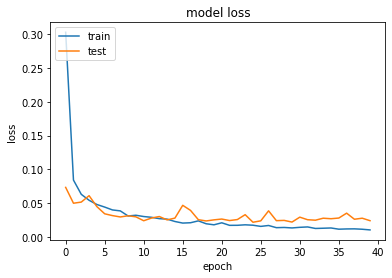

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

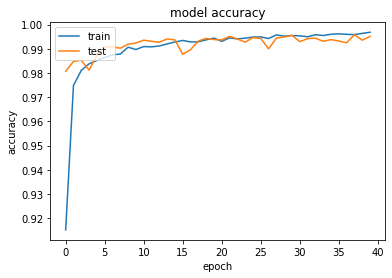

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In the end, it seems that adding a resnet-like structure did not make any significant improvements, but this is understandable because the last model already achieved 99.5% accuracy in validation data, which leaves practically no room for improvement. Digital Recognition is rather an easy task, so we might see some improvement by resnet-like structure on some other dataset. 

To conclude, I'll list the validation accuracy for every model below. (Since the training process is done randomly, a slight change in your run is expected.)
1. fully connected neural network - 97.49%
2. fully connected neural network with dropout - 97.21%
3. fully connected neural network with data augmentation - 97.26%
3. convolutional neural network - 99.13%
4. convolutional neural network with data augmentation - 99.44%
5. resnet-like CNN with data augmentation - 99.51%